# Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Link for dataset on drive

In [14]:
new_base_dir = '/content/drive/MyDrive/Colab Notebooks/datasets/chest_xray'

# Getting 300 images from each of the two classes (total 600) from dataset

In [24]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir +"/train",
    validation_split=0.885,
    subset="training",
    seed=1,
    image_size=(180, 180),
    batch_size=256)
validation_dataset = image_dataset_from_directory(
    new_base_dir + "/validation",
    image_size=(180, 180),
    batch_size=256)
test_dataset = image_dataset_from_directory(
    new_base_dir +"/test",
    image_size=(180, 180),
    batch_size=256)

Found 5216 files belonging to 2 classes.
Using 600 files for training.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


#Checking Shape

In [29]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (256, 180, 180, 3)
labels batch shape: (256,)


# Define a CNN with four Convolution Layers (16, 32, 64, 128) with kernal size 3.

In [39]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)

# Apply appropriate activation function at the last layer

In [47]:
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

# compile the model

In [48]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [49]:

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]

# training model on 50 epochs using previous 600 images

In [52]:
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks = callbacks)

Epoch 1/50
3/3 [==============================] - 4s 187ms/step - loss: 0.1566 - accuracy: 0.9350 - val_loss: 6.3392 - val_accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 4s 182ms/step - loss: 1.3627 - accuracy: 0.8517 - val_loss: 0.5125 - val_accuracy: 0.7500
Epoch 3/50
3/3 [==============================] - 4s 161ms/step - loss: 0.0985 - accuracy: 0.9733 - val_loss: 1.0519 - val_accuracy: 0.6250
Epoch 4/50
3/3 [==============================] - 4s 169ms/step - loss: 0.0691 - accuracy: 0.9800 - val_loss: 1.6232 - val_accuracy: 0.6250
Epoch 5/50
3/3 [==============================] - 4s 170ms/step - loss: 0.1927 - accuracy: 0.9100 - val_loss: 0.5843 - val_accuracy: 0.6875
Epoch 6/50
3/3 [==============================] - 4s 163ms/step - loss: 0.0662 - accuracy: 0.9833 - val_loss: 0.6485 - val_accuracy: 0.6875
Epoch 7/50
3/3 [==============================] - 4s 167ms/step - loss: 0.0532 - accuracy: 0.9850 - val_loss: 1.6357 - val_accuracy: 0.6250
Epoch 8/50
3/3 [====

# plot accuracy graph for training and validation

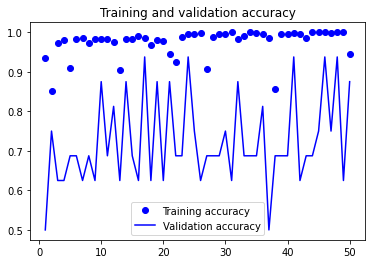

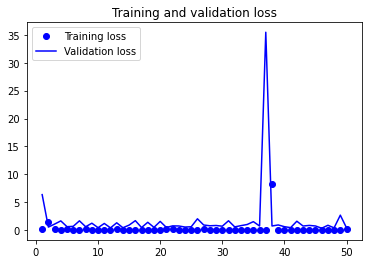

In [53]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

# Revising Training, Changin epochs to 17 because there is maximun validation accuracy

In [57]:
history = model.fit(
    train_dataset,
    epochs=17,
    validation_data=validation_dataset,
    callbacks = callbacks)

Epoch 1/17
3/3 [==============================] - 4s 177ms/step - loss: 0.5626 - accuracy: 0.8750 - val_loss: 0.5688 - val_accuracy: 0.7500
Epoch 2/17
3/3 [==============================] - 4s 176ms/step - loss: 0.0082 - accuracy: 0.9983 - val_loss: 0.6327 - val_accuracy: 0.7500
Epoch 3/17
3/3 [==============================] - 4s 174ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.7279 - val_accuracy: 0.7500
Epoch 4/17
3/3 [==============================] - 5s 173ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.6428 - val_accuracy: 0.7500
Epoch 5/17
3/3 [==============================] - 4s 176ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.8152 - val_accuracy: 0.7500
Epoch 6/17
3/3 [==============================] - 4s 170ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.8374 - val_accuracy: 0.7500
Epoch 7/17
3/3 [==============================] - 4s 172ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.9415 - val_accuracy: 0.7500
Epoch 8/17
3/3 [====

# evaluate model on the test dataset and report test accuracy 

In [58]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

3/3 [==============================] - 188s 242ms/step - loss: 2.0102 - accuracy: 0.7324
Test accuracy: 0.732
